In [154]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import datetime
#%matplotlib notebook
from functools import reduce
import matplotlib
import matplotlib.style as style 
import scipy.stats as stats
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

In [2]:
# Store filepath in a variable
hepatitis = "resources_update/hepatitis.csv"
measles = "resources_update/measles.csv"
mumps = "resources_update/mumps.csv"
pertussis = "resources_update/pertussis.csv"
polio = "resources_update/polio.csv"
rubella = "resources_update/rubella.csv"
smallpox = "resources_update/smallpox.csv"

hepatitis_df = pd.read_csv(hepatitis, encoding="ISO-8859-1")
measles_df = pd.read_csv(measles, encoding="ISO-8859-1")
mumps_df = pd.read_csv(mumps, encoding="ISO-8859-1")
pertussis_df = pd.read_csv(pertussis, encoding="ISO-8859-1")
polio_df = pd.read_csv(polio, encoding="ISO-8859-1")
rubella_df = pd.read_csv(rubella, encoding="ISO-8859-1")
smallpox_df = pd.read_csv(smallpox, encoding="ISO-8859-1")

polio_df.head()

,Unnamed: 0,state,State Name,disease,Number of Polio Cases,"Polio Incidence Per 100,000 People",year,number_week
0,0,AL,ALABAMA,POLIO,0,0.00,1928,1
1,1,AR,ARKANSAS,POLIO,0,0.00,1928,1
2,2,AZ,ARIZONA,POLIO,0,0.00,1928,1
3,3,CA,CALIFORNIA,POLIO,9,0.17,1928,1
4,4,CO,COLORADO,POLIO,4,0.39,1928,1


In [3]:
hepatitis_df = hepatitis_df.rename(columns={"incidence_per_capita": "Hepatitis Incidence Per 100,000 People", "cases": "Number of Hepatitis Cases", "state_name": "State Name"})
measles_df = measles_df.rename(columns={"incidence_per_capita": "Measles Incidence Per 100,000 People", "cases": "Number of Measles Cases", "state_name": "State Name"})
mumps_df = mumps_df.rename(columns={"incidence_per_capita": "Mumps Incidence Per 100,000 People", "cases": "Number of Mumps Cases", "state_name": "State Name"})
pertussis_df = pertussis_df.rename(columns={"incidence_per_capita": "Pertussis Incidence Per 100,000 People", "cases": "Number of Pertussis Cases", "state_name": "State Name"})
polio_df = polio_df.rename(columns={"incidence_per_capita": "Polio Incidence Per 100,000 People", "cases": "Number of Polio Cases", "state_name": "State Name"})
rubella_df = rubella_df.rename(columns={"incidence_per_capita": "Rubella Incidence Per 100,000 People", "cases": "Number of Rubella Cases", "state_name": "State Name"})
smallpox_df = smallpox_df.rename(columns={"incidence_per_capita": "Smallpox Incidence Per 100,000 People", "cases": "Number of Smallpox Cases", "state_name": "State Name"})
polio_df.head()

,Unnamed: 0,state,State Name,disease,Number of Polio Cases,"Polio Incidence Per 100,000 People",year,number_week
0,0,AL,ALABAMA,POLIO,0,0.00,1928,1
1,1,AR,ARKANSAS,POLIO,0,0.00,1928,1
2,2,AZ,ARIZONA,POLIO,0,0.00,1928,1
3,3,CA,CALIFORNIA,POLIO,9,0.17,1928,1
4,4,CO,COLORADO,POLIO,4,0.39,1928,1


In [4]:
clean_hepatitis_df = hepatitis_df.drop(columns=["Unnamed: 0"])
clean_measles_df = measles_df.drop(columns=["Unnamed: 0"])
clean_mumps_df = mumps_df.drop(columns=["Unnamed: 0"])
clean_pertussis_df = pertussis_df.drop(columns=["Unnamed: 0"])
clean_polio_df = polio_df.drop(columns=["Unnamed: 0"])
clean_rubella_df = rubella_df.drop(columns=["Unnamed: 0"])
clean_smallpox_df = smallpox_df.drop(columns=["Unnamed: 0"])
clean_smallpox_df.head()

,state,State Name,disease,Number of Smallpox Cases,"Smallpox Incidence Per 100,000 People",year,number_week
0,AL,ALABAMA,SMALLPOX,1,0.04,1928,1
1,AR,ARKANSAS,SMALLPOX,7,0.38,1928,1
2,AZ,ARIZONA,SMALLPOX,0,0.00,1928,1
3,CA,CALIFORNIA,SMALLPOX,18,0.34,1928,1
4,CO,COLORADO,SMALLPOX,31,3.06,1928,1


In [5]:
grouped_clean_hepatitis_df = clean_hepatitis_df.groupby(["State Name"])
mean_grouped_clean_hepatitis_df = grouped_clean_hepatitis_df.mean()
mean_grouped_clean_hepatitis_df = mean_grouped_clean_hepatitis_df.drop(columns=["year", "number_week"])
reset_mean_grouped_clean_hepatitis_df = mean_grouped_clean_hepatitis_df.reset_index()
reset_mean_grouped_clean_hepatitis_df.head()

,State Name,Number of Hepatitis Cases,"Hepatitis Incidence Per 100,000 People"
0,ALABAMA,3.358933,0.089376
1,ALASKA,3.957253,0.919173
2,ARIZONA,16.342213,0.516839
3,ARKANSAS,4.351916,0.194175
4,CALIFORNIA,95.561439,0.393901


In [6]:
grouped_clean_measles_df = clean_measles_df.groupby(["State Name"])
mean_grouped_clean_measles_df = grouped_clean_measles_df.mean()
mean_grouped_clean_measles_df = mean_grouped_clean_measles_df.drop(columns=["year", "number_week"])
reset_mean_grouped_clean_measles_df = mean_grouped_clean_measles_df.reset_index()
reset_mean_grouped_clean_measles_df.head()

,State Name,Number of Measles Cases,"Measles Incidence Per 100,000 People"
0,ALABAMA,76.854419,2.603788
1,ALASKA,12.441501,5.242009
2,ARIZONA,52.312947,5.949236
3,ARKANSAS,53.084223,2.884856
4,CALIFORNIA,375.777020,3.885914


In [7]:
grouped_clean_mumps_df = clean_mumps_df.groupby(["State Name"])
mean_grouped_clean_mumps_df = grouped_clean_mumps_df.mean()
mean_grouped_clean_mumps_df = mean_grouped_clean_mumps_df.drop(columns=["year", "number_week"])
reset_mean_grouped_clean_mumps_df = mean_grouped_clean_mumps_df.reset_index()
reset_mean_grouped_clean_mumps_df.head()

,State Name,Number of Mumps Cases,"Mumps Incidence Per 100,000 People"
0,ALABAMA,4.146422,0.113874
1,ALASKA,2.374756,0.736311
2,ARIZONA,6.743292,0.334075
3,ARKANSAS,2.909225,0.131033
4,CALIFORNIA,38.122867,0.182207


In [8]:
grouped_clean_pertussis_df = clean_pertussis_df.groupby(["State Name"])
mean_grouped_clean_pertussis_df = grouped_clean_pertussis_df.mean()
mean_grouped_clean_pertussis_df = mean_grouped_clean_pertussis_df.drop(columns=["year", "number_week"])
reset_mean_grouped_clean_pertussis_df = mean_grouped_clean_pertussis_df.reset_index()
reset_mean_grouped_clean_pertussis_df.head()

,State Name,Number of Pertussis Cases,"Pertussis Incidence Per 100,000 People"
0,ALABAMA,11.291022,0.377691
1,ALASKA,0.880889,0.230649
2,ARIZONA,11.485652,1.415939
3,ARKANSAS,9.927964,0.520309
4,CALIFORNIA,59.429119,0.661621


In [9]:
grouped_clean_polio_df = clean_polio_df.groupby(["State Name"])
mean_grouped_clean_polio_df = grouped_clean_polio_df.mean()
mean_grouped_clean_polio_df = mean_grouped_clean_polio_df.drop(columns=["year", "number_week"])
reset_mean_grouped_clean_polio_df = mean_grouped_clean_polio_df.reset_index()
reset_mean_grouped_clean_polio_df.head()

,State Name,Number of Polio Cases,"Polio Incidence Per 100,000 People"
0,ALABAMA,3.463387,0.117037
1,ALASKA,2.023077,1.020077
2,ARIZONA,1.756614,0.236684
3,ARKANSAS,3.163182,0.171585
4,CALIFORNIA,24.775817,0.258594


In [10]:
grouped_clean_rubella_df = clean_rubella_df.groupby(["State Name"])
mean_grouped_clean_rubella_df = grouped_clean_rubella_df.mean()
mean_grouped_clean_rubella_df = mean_grouped_clean_rubella_df.drop(columns=["year", "number_week"])
reset_mean_grouped_clean_rubella_df = mean_grouped_clean_rubella_df.reset_index()
reset_mean_grouped_clean_rubella_df.head()

,State Name,Number of Rubella Cases,"Rubella Incidence Per 100,000 People"
0,ALABAMA,2.382114,0.067724
1,ALASKA,1.805875,0.614904
2,ARIZONA,5.659853,0.322150
3,ARKANSAS,1.265380,0.061580
4,CALIFORNIA,32.731481,0.157986


In [11]:
grouped_clean_smallpox_df = clean_smallpox_df.groupby(["State Name"])
mean_grouped_clean_smallpox_df = grouped_clean_smallpox_df.mean()
mean_grouped_clean_smallpox_df = mean_grouped_clean_smallpox_df.drop(columns=["year", "number_week"])
reset_mean_grouped_clean_smallpox_df = mean_grouped_clean_smallpox_df.reset_index()
reset_mean_grouped_clean_smallpox_df.head()

,State Name,Number of Smallpox Cases,"Smallpox Incidence Per 100,000 People"
0,ALABAMA,2.032136,0.075718
1,ARIZONA,1.782895,0.397096
2,ARKANSAS,3.010397,0.159868
3,CALIFORNIA,10.854305,0.183046
4,COLORADO,3.779773,0.353762


In [12]:
combined_data_df = pd.concat([mean_grouped_clean_hepatitis_df, mean_grouped_clean_measles_df, mean_grouped_clean_mumps_df, mean_grouped_clean_pertussis_df, mean_grouped_clean_polio_df, mean_grouped_clean_rubella_df, mean_grouped_clean_smallpox_df], axis=1, join='outer', ignore_index=False, sort=True)
combined_data_df.head()

,Number of Hepatitis Cases,"Hepatitis Incidence Per 100,000 People",Number of Measles Cases,"Measles Incidence Per 100,000 People",Number of Mumps Cases,"Mumps Incidence Per 100,000 People",Number of Pertussis Cases,"Pertussis Incidence Per 100,000 People",Number of Polio Cases,"Polio Incidence Per 100,000 People",Number of Rubella Cases,"Rubella Incidence Per 100,000 People",Number of Smallpox Cases,"Smallpox Incidence Per 100,000 People"
ALABAMA,3.358933,0.089376,76.854419,2.603788,4.146422,0.113874,11.291022,0.377691,3.463387,0.117037,2.382114,0.067724,2.032136,0.075718
ALASKA,3.957253,0.919173,12.441501,5.242009,2.374756,0.736311,0.880889,0.230649,2.023077,1.020077,1.805875,0.614904,NaN,NaN
ARIZONA,16.342213,0.516839,52.312947,5.949236,6.743292,0.334075,11.485652,1.415939,1.756614,0.236684,5.659853,0.322150,1.782895,0.397096
ARKANSAS,4.351916,0.194175,53.084223,2.884856,2.909225,0.131033,9.927964,0.520309,3.163182,0.171585,1.265380,0.061580,3.010397,0.159868
CALIFORNIA,95.561439,0.393901,375.777020,3.885914,38.122867,0.182207,59.429119,0.661621,24.775817,0.258594,32.731481,0.157986,10.854305,0.183046


In [13]:
combined_numbercases_mean_df = combined_data_df[["Number of Hepatitis Cases", "Number of Measles Cases", "Number of Mumps Cases", "Number of Pertussis Cases", "Number of Polio Cases", "Number of Rubella Cases", "Number of Smallpox Cases"]]
combined_numbercases_mean_df.head()

,Number of Hepatitis Cases,Number of Measles Cases,Number of Mumps Cases,Number of Pertussis Cases,Number of Polio Cases,Number of Rubella Cases,Number of Smallpox Cases
ALABAMA,3.358933,76.854419,4.146422,11.291022,3.463387,2.382114,2.032136
ALASKA,3.957253,12.441501,2.374756,0.880889,2.023077,1.805875,NaN
ARIZONA,16.342213,52.312947,6.743292,11.485652,1.756614,5.659853,1.782895
ARKANSAS,4.351916,53.084223,2.909225,9.927964,3.163182,1.265380,3.010397
CALIFORNIA,95.561439,375.777020,38.122867,59.429119,24.775817,32.731481,10.854305


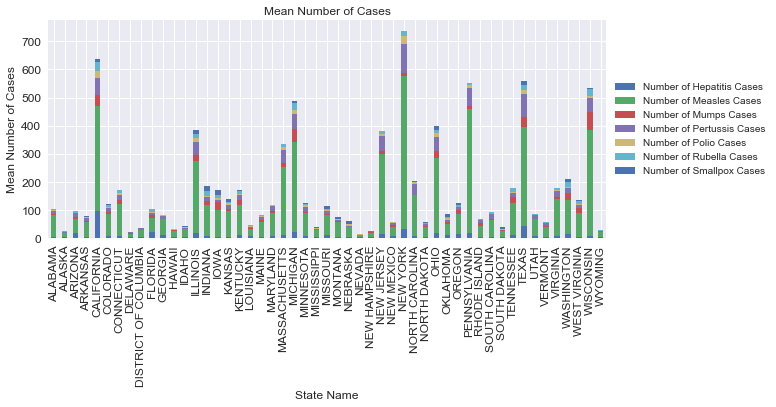

In [183]:
style.use('seaborn-poster') #sets the size of the charts
style.use('seaborn')
stacked_mean_cases = combined_numbercases_mean_df.plot(kind='bar', stacked=True, title ="Mean Number of Cases", figsize=(10, 4), legend=True, fontsize=12)  #, color = ["orange", "green", "yellow", "blue", "red", "purple", "violet"])
stacked_mean_cases.set_xlabel("State Name", fontsize=12)
stacked_mean_cases.set_ylabel("Mean Number of Cases", fontsize=12)
#plt.ylim(0, 14)
stacked_mean_cases.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("images/mean_number_cases_all_state" + '.png', bbox_inches='tight')
plt.show()


In [15]:
combined_incidence_mean_df = combined_data_df[["Hepatitis Incidence Per 100,000 People", "Measles Incidence Per 100,000 People", "Mumps Incidence Per 100,000 People", "Pertussis Incidence Per 100,000 People", "Polio Incidence Per 100,000 People", "Rubella Incidence Per 100,000 People", "Smallpox Incidence Per 100,000 People"]]
combined_incidence_mean_df.head()

,"Hepatitis Incidence Per 100,000 People","Measles Incidence Per 100,000 People","Mumps Incidence Per 100,000 People","Pertussis Incidence Per 100,000 People","Polio Incidence Per 100,000 People","Rubella Incidence Per 100,000 People","Smallpox Incidence Per 100,000 People"
ALABAMA,0.089376,2.603788,0.113874,0.377691,0.117037,0.067724,0.075718
ALASKA,0.919173,5.242009,0.736311,0.230649,1.020077,0.614904,NaN
ARIZONA,0.516839,5.949236,0.334075,1.415939,0.236684,0.322150,0.397096
ARKANSAS,0.194175,2.884856,0.131033,0.520309,0.171585,0.061580,0.159868
CALIFORNIA,0.393901,3.885914,0.182207,0.661621,0.258594,0.157986,0.183046


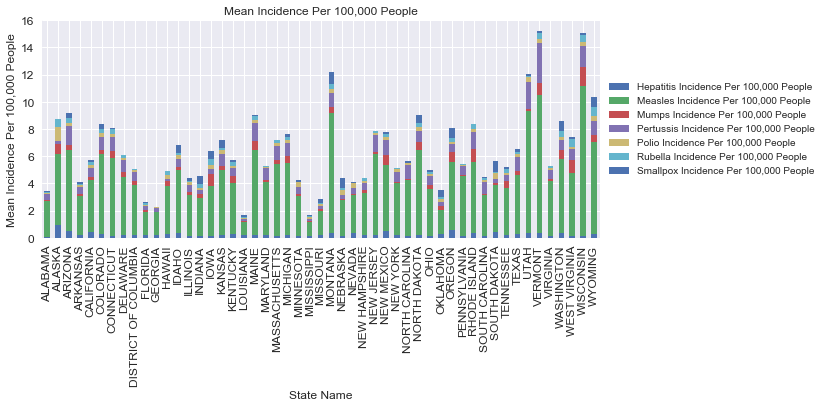

In [184]:
style.use('seaborn-poster') #sets the size of the charts
style.use('seaborn')
stacked_mean_incidence = combined_incidence_mean_df.plot(kind='bar', stacked=True, title ="Mean Incidence Per 100,000 People", figsize=(10, 4), legend=True, fontsize=12)  #, color = ["orange", "green", "yellow", "blue", "red", "purple", "violet"])
stacked_mean_incidence.set_xlabel("State Name", fontsize=12)
stacked_mean_incidence.set_ylabel("Mean Incidence Per 100,000 People", fontsize=12)
#plt.ylim(0, 14)
stacked_mean_incidence.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("images/mean_incidence_per_all_states_stacked_bar" + '.png', bbox_inches='tight')
plt.show()

In [17]:
grouped_clean_hepatitis_df = clean_hepatitis_df.groupby(["State Name"])
sum_grouped_clean_hepatitis_df = grouped_clean_hepatitis_df.sum()
sum_grouped_clean_hepatitis_df = sum_grouped_clean_hepatitis_df.drop(columns=["year", "number_week"])
reset_sum_grouped_clean_hepatitis_df = sum_grouped_clean_hepatitis_df.reset_index()
reset_sum_grouped_clean_hepatitis_df.head()

,State Name,Number of Hepatitis Cases,"Hepatitis Incidence Per 100,000 People"
0,ALABAMA,6298,167.58
1,ALASKA,5647,1311.66
2,ARIZONA,31900,1008.87
3,ARKANSAS,7494,334.37
4,CALIFORNIA,191314,788.59


In [18]:
grouped_clean_measles_df = clean_measles_df.groupby(["State Name"])
sum_grouped_clean_measles_df = grouped_clean_measles_df.sum()
sum_grouped_clean_measles_df = sum_grouped_clean_measles_df.drop(columns=["year", "number_week"])
reset_sum_grouped_clean_measles_df = sum_grouped_clean_measles_df.reset_index()
reset_sum_grouped_clean_measles_df.head()

,State Name,Number of Measles Cases,"Measles Incidence Per 100,000 People"
0,ALABAMA,209582,7100.53
1,ALASKA,16908,7123.89
2,ARIZONA,160810,18287.95
3,ARKANSAS,134250,7295.80
4,CALIFORNIA,1376847,14237.99


In [19]:
grouped_clean_mumps_df = clean_mumps_df.groupby(["State Name"])
sum_grouped_clean_mumps_df = grouped_clean_mumps_df.sum()
sum_grouped_clean_mumps_df = sum_grouped_clean_mumps_df.drop(columns=["year", "number_week"])
reset_sum_grouped_clean_mumps_df = sum_grouped_clean_mumps_df.reset_index()
reset_sum_grouped_clean_mumps_df.head()

,State Name,Number of Mumps Cases,"Mumps Incidence Per 100,000 People"
0,ALABAMA,6315,173.43
1,ALASKA,3650,1131.71
2,ARIZONA,9299,460.69
3,ARKANSAS,3942,177.55
4,CALIFORNIA,67020,320.32


In [20]:
grouped_clean_pertussis_df = clean_pertussis_df.groupby(["State Name"])
sum_grouped_clean_pertussis_df = grouped_clean_pertussis_df.sum()
sum_grouped_clean_pertussis_df = sum_grouped_clean_pertussis_df.drop(columns=["year", "number_week"])
reset_sum_grouped_clean_pertussis_df = sum_grouped_clean_pertussis_df.reset_index()
reset_sum_grouped_clean_pertussis_df.head()

,State Name,Number of Pertussis Cases,"Pertussis Incidence Per 100,000 People"
0,ALABAMA,25529,853.96
1,ALASKA,991,259.48
2,ARIZONA,26417,3256.66
3,ARKANSAS,22189,1162.89
4,CALIFORNIA,155110,1726.83


In [21]:
grouped_clean_polio_df = clean_polio_df.groupby(["State Name"])
sum_grouped_clean_polio_df = grouped_clean_polio_df.sum()
sum_grouped_clean_polio_df = sum_grouped_clean_polio_df.drop(columns=["year", "number_week"])
reset_sum_grouped_clean_polio_df = sum_grouped_clean_polio_df.reset_index()
reset_sum_grouped_clean_polio_df.head()

,State Name,Number of Polio Cases,"Polio Incidence Per 100,000 People"
0,ALABAMA,6054,204.58
1,ALASKA,526,265.22
2,ARIZONA,2988,402.60
3,ARKANSAS,5447,295.47
4,CALIFORNIA,47743,498.31


In [22]:
grouped_clean_rubella_df = clean_rubella_df.groupby(["State Name"])
sum_grouped_clean_rubella_df = grouped_clean_rubella_df.sum()
sum_grouped_clean_rubella_df = sum_grouped_clean_rubella_df.drop(columns=["year", "number_week"])
reset_sum_grouped_clean_rubella_df = sum_grouped_clean_rubella_df.reset_index()
reset_sum_grouped_clean_rubella_df.head()

,State Name,Number of Rubella Cases,"Rubella Incidence Per 100,000 People"
0,ALABAMA,2051,58.31
1,ALASKA,1414,481.47
2,ARIZONA,6922,393.99
3,ARKANSAS,1049,51.05
4,CALIFORNIA,56560,273.00


In [51]:
grouped_clean_smallpox_df = clean_smallpox_df.groupby(["State Name"])
sum_grouped_clean_smallpox_df = grouped_clean_smallpox_df.sum()
sum_grouped_clean_smallpox_df = sum_grouped_clean_smallpox_df.drop(columns=["year", "number_week"])
reset_sum_grouped_clean_smallpox_df = sum_grouped_clean_smallpox_df.reset_index()
reset_sum_grouped_clean_smallpox_df.head()

,State Name,Number of Smallpox Cases,"Smallpox Incidence Per 100,000 People"
0,ALABAMA,2150,80.11
1,ARIZONA,1897,422.51
2,ARKANSAS,3185,169.14
3,CALIFORNIA,11473,193.48
4,COLORADO,3999,374.28


In [52]:
combined_data_sum_df = pd.concat([sum_grouped_clean_hepatitis_df, sum_grouped_clean_measles_df, sum_grouped_clean_mumps_df, sum_grouped_clean_pertussis_df, sum_grouped_clean_polio_df, sum_grouped_clean_rubella_df, sum_grouped_clean_smallpox_df], axis=1, join='outer', ignore_index=False, sort=True)
combined_data_sum_df.head()

,Number of Hepatitis Cases,"Hepatitis Incidence Per 100,000 People",Number of Measles Cases,"Measles Incidence Per 100,000 People",Number of Mumps Cases,"Mumps Incidence Per 100,000 People",Number of Pertussis Cases,"Pertussis Incidence Per 100,000 People",Number of Polio Cases,"Polio Incidence Per 100,000 People",Number of Rubella Cases,"Rubella Incidence Per 100,000 People",Number of Smallpox Cases,"Smallpox Incidence Per 100,000 People"
ALABAMA,6298,167.58,209582,7100.53,6315,173.43,25529,853.96,6054,204.58,2051,58.31,2150.0,80.11
ALASKA,5647,1311.66,16908,7123.89,3650,1131.71,991,259.48,526,265.22,1414,481.47,NaN,NaN
ARIZONA,31900,1008.87,160810,18287.95,9299,460.69,26417,3256.66,2988,402.60,6922,393.99,1897.0,422.51
ARKANSAS,7494,334.37,134250,7295.80,3942,177.55,22189,1162.89,5447,295.47,1049,51.05,3185.0,169.14
CALIFORNIA,191314,788.59,1376847,14237.99,67020,320.32,155110,1726.83,47743,498.31,56560,273.00,11473.0,193.48


In [53]:
combined_numbercases_sum_df = combined_data_sum_df[["Number of Hepatitis Cases", "Number of Measles Cases", "Number of Mumps Cases", "Number of Pertussis Cases", "Number of Polio Cases", "Number of Rubella Cases", "Number of Smallpox Cases"]]
combined_numbercases_sum_df.head()

,Number of Hepatitis Cases,Number of Measles Cases,Number of Mumps Cases,Number of Pertussis Cases,Number of Polio Cases,Number of Rubella Cases,Number of Smallpox Cases
ALABAMA,6298,209582,6315,25529,6054,2051,2150.0
ALASKA,5647,16908,3650,991,526,1414,NaN
ARIZONA,31900,160810,9299,26417,2988,6922,1897.0
ARKANSAS,7494,134250,3942,22189,5447,1049,3185.0
CALIFORNIA,191314,1376847,67020,155110,47743,56560,11473.0


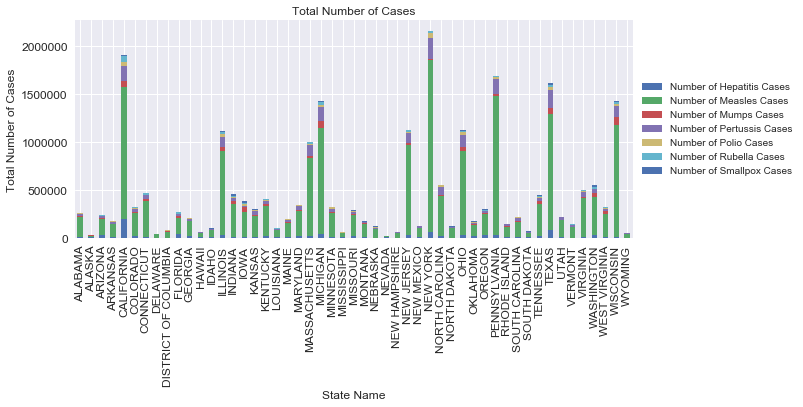

In [185]:
style.use('seaborn-poster') #sets the size of the charts
style.use('seaborn')
stacked_sum_cases = combined_numbercases_sum_df.plot(kind='bar', stacked=True, title ="Total Number of Cases", figsize=(10, 4), legend=True, fontsize=12)  #, color = ["orange", "green", "yellow", "blue", "red", "purple", "violet"])
stacked_sum_cases.set_xlabel("State Name", fontsize=12)
stacked_sum_cases.set_ylabel("Total Number of Cases", fontsize=12)
#plt.ylim(0, 14)
stacked_sum_cases.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("images/total_cases_per_all_states_stacked_bar" + '.png', bbox_inches='tight')
plt.show()

In [55]:
combined_incidence_sum_df = combined_data_sum_df[["Hepatitis Incidence Per 100,000 People", "Measles Incidence Per 100,000 People", "Mumps Incidence Per 100,000 People", "Pertussis Incidence Per 100,000 People", "Polio Incidence Per 100,000 People", "Rubella Incidence Per 100,000 People", "Smallpox Incidence Per 100,000 People"]]
combined_incidence_sum_df.head()

,"Hepatitis Incidence Per 100,000 People","Measles Incidence Per 100,000 People","Mumps Incidence Per 100,000 People","Pertussis Incidence Per 100,000 People","Polio Incidence Per 100,000 People","Rubella Incidence Per 100,000 People","Smallpox Incidence Per 100,000 People"
ALABAMA,167.58,7100.53,173.43,853.96,204.58,58.31,80.11
ALASKA,1311.66,7123.89,1131.71,259.48,265.22,481.47,NaN
ARIZONA,1008.87,18287.95,460.69,3256.66,402.60,393.99,422.51
ARKANSAS,334.37,7295.80,177.55,1162.89,295.47,51.05,169.14
CALIFORNIA,788.59,14237.99,320.32,1726.83,498.31,273.00,193.48


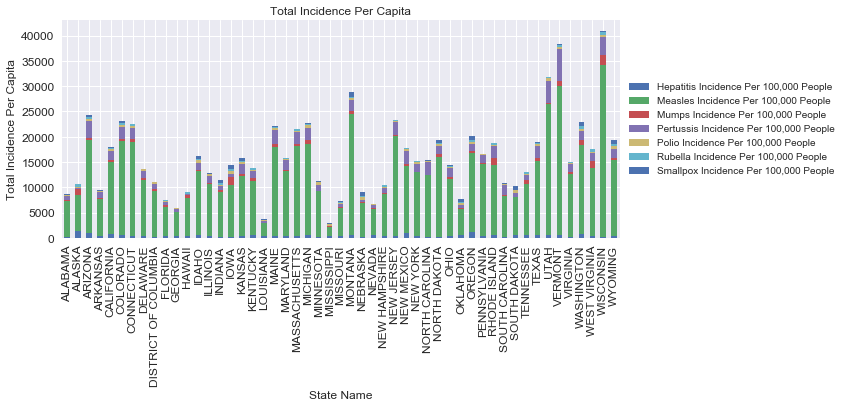

In [186]:
style.use('seaborn-poster') #sets the size of the charts
style.use('seaborn')
stacked_sum_incidence = combined_incidence_sum_df.plot(kind='bar', stacked=True, title ="Total Incidence Per Capita", figsize=(10, 4), legend=True, fontsize=12)  #, color = ["orange", "green", "yellow", "blue", "red", "purple", "violet"])
stacked_sum_incidence.set_xlabel("State Name", fontsize=12)
stacked_sum_incidence.set_ylabel("Total Incidence Per Capita", fontsize=12)
#plt.ylim(0, 14)
stacked_sum_incidence.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("images/total_incidence_all_states_stacked_bar" + '.png', bbox_inches='tight')
plt.show()

In [57]:
grouped_clean_hepatitis_year_df = clean_hepatitis_df.groupby(["year"])
mean_grouped_clean_hepatitis_year_df = grouped_clean_hepatitis_year_df.mean()
mean_grouped_clean_hepatitis_year_df = mean_grouped_clean_hepatitis_year_df.drop(columns=["number_week"])
reset_mean_grouped_clean_hepatitis_year_df = mean_grouped_clean_hepatitis_year_df.reset_index()
reset_mean_grouped_clean_hepatitis_year_df.head()

,year,Number of Hepatitis Cases,"Hepatitis Incidence Per 100,000 People"
0,1966,14.394316,0.356927
1,1967,17.020898,0.393201
2,1968,19.467700,0.440896
3,1969,20.171854,0.477659
4,1970,23.091213,0.562473


In [58]:
grouped_clean_measles_year_df = clean_measles_df.groupby(["year"])
mean_grouped_clean_measles_year_df = grouped_clean_measles_year_df.mean()
mean_grouped_clean_measles_year_df = mean_grouped_clean_measles_year_df.drop(columns=["number_week"])
reset_mean_grouped_clean_measles_year_df = mean_grouped_clean_measles_year_df.reset_index()
reset_mean_grouped_clean_measles_year_df.head()

,year,Number of Measles Cases,"Measles Incidence Per 100,000 People"
0,1928,224.494659,7.860817
1,1929,155.034751,5.514842
2,1930,176.744945,6.698120
3,1931,199.107629,7.006208
4,1932,181.448372,6.735400


In [59]:
grouped_clean_mumps_year_df = clean_mumps_df.groupby(["year"])
mean_grouped_clean_mumps_year_df = grouped_clean_mumps_year_df.mean()
mean_grouped_clean_mumps_year_df = mean_grouped_clean_mumps_year_df.drop(columns=["number_week"])
reset_mean_grouped_clean_mumps_year_df = mean_grouped_clean_mumps_year_df.reset_index()
reset_mean_grouped_clean_mumps_year_df.head()

,year,Number of Mumps Cases,"Mumps Incidence Per 100,000 People"
0,1968,70.006866,2.261005
1,1969,41.901648,1.519562
2,1970,40.499791,1.286344
3,1971,47.654424,1.293639
4,1972,27.399332,0.816512


In [60]:
grouped_clean_pertussis_year_df = clean_pertussis_df.groupby(["year"])
mean_grouped_clean_pertussis_year_df = grouped_clean_pertussis_year_df.mean()
mean_grouped_clean_pertussis_year_df = mean_grouped_clean_pertussis_year_df.drop(columns=["number_week"])
reset_mean_grouped_clean_pertussis_year_df = mean_grouped_clean_pertussis_year_df.reset_index()
reset_mean_grouped_clean_pertussis_year_df.head()

,year,Number of Pertussis Cases,"Pertussis Incidence Per 100,000 People"
0,1938,88.180515,3.649540
1,1939,75.990995,3.155346
2,1940,71.716542,2.624501
3,1941,82.752657,3.087621
4,1942,72.474307,2.661277


In [61]:
grouped_clean_polio_year_df = clean_polio_df.groupby(["year"])
mean_grouped_clean_polio_year_df = grouped_clean_polio_year_df.mean()
mean_grouped_clean_polio_year_df = mean_grouped_clean_polio_year_df.drop(columns=["number_week"])
reset_mean_grouped_clean_polio_year_df = mean_grouped_clean_polio_year_df.reset_index()
reset_mean_grouped_clean_polio_year_df.head()

,year,Number of Polio Cases,"Polio Incidence Per 100,000 People"
0,1928,1.972625,0.095865
1,1929,1.117168,0.039919
2,1930,3.725686,0.145490
3,1931,6.417856,0.178732
4,1932,1.543952,0.048097


In [62]:
grouped_clean_rubella_year_df = clean_rubella_df.groupby(["year"])
mean_grouped_clean_rubella_year_df = grouped_clean_rubella_year_df.mean()
mean_grouped_clean_rubella_year_df = mean_grouped_clean_rubella_year_df.drop(columns=["number_week"])
reset_mean_grouped_clean_rubella_year_df = mean_grouped_clean_rubella_year_df.reset_index()
reset_mean_grouped_clean_rubella_year_df.head()

,year,Number of Rubella Cases,"Rubella Incidence Per 100,000 People"
0,1966,28.893248,0.932997
1,1967,27.479791,0.869316
2,1968,26.439845,0.750690
3,1969,27.090909,0.855300
4,1970,22.029424,0.548055


In [63]:
grouped_clean_smallpox_year_df = clean_smallpox_df.groupby(["year"])
mean_grouped_clean_smallpox_year_df = grouped_clean_smallpox_year_df.mean()
mean_grouped_clean_smallpox_year_df = mean_grouped_clean_smallpox_year_df.drop(columns=["number_week"])
reset_mean_grouped_clean_smallpox_year_df = mean_grouped_clean_smallpox_year_df.reset_index()
reset_mean_grouped_clean_smallpox_year_df.head()

,year,Number of Smallpox Cases,"Smallpox Incidence Per 100,000 People"
0,1928,15.440305,0.856037
1,1929,15.746103,0.833532
2,1930,18.695012,0.890658
3,1931,11.727124,0.552623
4,1932,4.346418,0.219620


In [64]:
combined_data_mean_year_df = pd.concat([mean_grouped_clean_hepatitis_year_df, mean_grouped_clean_measles_year_df, mean_grouped_clean_mumps_year_df, mean_grouped_clean_pertussis_year_df, mean_grouped_clean_polio_year_df, mean_grouped_clean_rubella_year_df, mean_grouped_clean_smallpox_year_df], axis=1, join='outer', ignore_index=False, sort=True)
combined_data_mean_year_df.head()

,Number of Hepatitis Cases,"Hepatitis Incidence Per 100,000 People",Number of Measles Cases,"Measles Incidence Per 100,000 People",Number of Mumps Cases,"Mumps Incidence Per 100,000 People",Number of Pertussis Cases,"Pertussis Incidence Per 100,000 People",Number of Polio Cases,"Polio Incidence Per 100,000 People",Number of Rubella Cases,"Rubella Incidence Per 100,000 People",Number of Smallpox Cases,"Smallpox Incidence Per 100,000 People"
year,,,,,,,,,,,,,,
1928,NaN,NaN,224.494659,7.860817,NaN,NaN,NaN,NaN,1.972625,0.095865,NaN,NaN,15.440305,0.856037
1929,NaN,NaN,155.034751,5.514842,NaN,NaN,NaN,NaN,1.117168,0.039919,NaN,NaN,15.746103,0.833532
1930,NaN,NaN,176.744945,6.698120,NaN,NaN,NaN,NaN,3.725686,0.145490,NaN,NaN,18.695012,0.890658
1931,NaN,NaN,199.107629,7.006208,NaN,NaN,NaN,NaN,6.417856,0.178732,NaN,NaN,11.727124,0.552623
1932,NaN,NaN,181.448372,6.735400,NaN,NaN,NaN,NaN,1.543952,0.048097,NaN,NaN,4.346418,0.219620


In [65]:
combined_numbercases_mean_year_df = combined_data_mean_year_df[["Number of Hepatitis Cases", "Number of Measles Cases", "Number of Mumps Cases", "Number of Pertussis Cases", "Number of Polio Cases", "Number of Rubella Cases", "Number of Smallpox Cases"]]
combined_numbercases_mean_year_df.head()
reset_combined_numbercases_mean_year_df = combined_numbercases_mean_year_df.reset_index()
reset_combined_numbercases_mean_year_df.head()
#reset_combined_numbercases_mean_year_df.year = reset_combined_numbercases_mean_year_df.year.astype(str)
#reset_combined_numbercases_mean_year_df.dtypes

,year,Number of Hepatitis Cases,Number of Measles Cases,Number of Mumps Cases,Number of Pertussis Cases,Number of Polio Cases,Number of Rubella Cases,Number of Smallpox Cases
0,1928,NaN,224.494659,NaN,NaN,1.972625,NaN,15.440305
1,1929,NaN,155.034751,NaN,NaN,1.117168,NaN,15.746103
2,1930,NaN,176.744945,NaN,NaN,3.725686,NaN,18.695012
3,1931,NaN,199.107629,NaN,NaN,6.417856,NaN,11.727124
4,1932,NaN,181.448372,NaN,NaN,1.543952,NaN,4.346418


In [66]:
#plt.xticks(combined_numbercases_mean_year_df.index.values) 
# xticks = reset_combined_numbercases_mean_year_df["year"]
#fig, ax = plt.subplots()

#reset_combined_numbercases_mean_year_df.head()

#year = reset_combined_numbercases_mean_year_df["year"]
#cases = reset_combined_numbercases_mean_year_df[["year", "Number of Measles Cases"]]

#print(year)

#plt.plot(reset_combined_numbercases_mean_year_df["year"], reset_combined_numbercases_mean_year_df["Number of Measles Cases"]) #,xticks=year, rot=90)#xticks=combined_numbercases_mean_year_df.index.values)
#ax.set_xticklabels(cases[year])

#plt.title("Average Number of Cases")
#plt.xlabel("Year")
#plt.ylabel("Average Number of Cases")
# #plt.xlim(-2, 47)
# #plt.ylim(33, 74)
# plt.grid()
#plt.show()

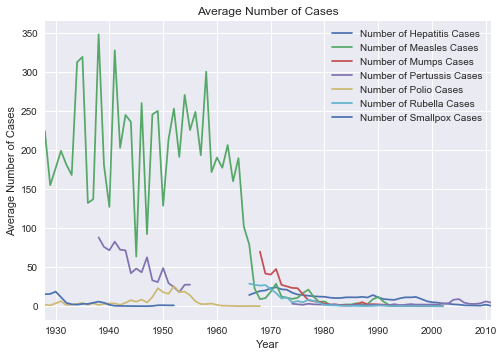

In [187]:
combined_numbercases_mean_year_df.plot()
plt.title("Average Number of Cases")
plt.xlabel("Year")
plt.ylabel("Average Number of Cases")
plt.savefig("images/avg_cases_byyear_all" + '.png', bbox_inches='tight')

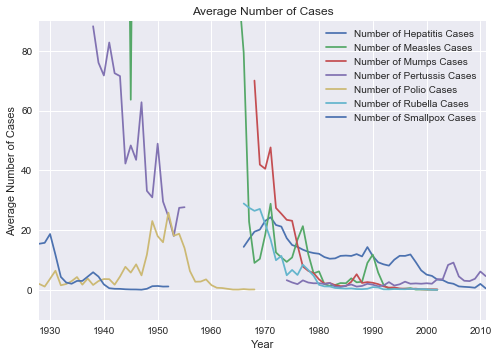

In [188]:
combined_numbercases_mean_year_df.plot()
plt.title("Average Number of Cases")
plt.xlabel("Year")
plt.ylabel("Average Number of Cases")
plt.ylim(-10, 90)
plt.savefig("images/avg_cases_byyear_all_inset" + '.png', bbox_inches='tight')

In [39]:
combined_incidence_mean_year_df = combined_data_mean_year_df[["Hepatitis Incidence Per 100,000 People", "Measles Incidence Per 100,000 People", "Mumps Incidence Per 100,000 People", "Pertussis Incidence Per 100,000 People", "Polio Incidence Per 100,000 People", "Rubella Incidence Per 100,000 People", "Smallpox Incidence Per 100,000 People"]]
combined_incidence_mean_year_df.head()

,"Hepatitis Incidence Per 100,000 People","Measles Incidence Per 100,000 People","Mumps Incidence Per 100,000 People","Pertussis Incidence Per 100,000 People","Polio Incidence Per 100,000 People","Rubella Incidence Per 100,000 People","Smallpox Incidence Per 100,000 People"
year,,,,,,,
1928,NaN,7.860817,NaN,NaN,0.095865,NaN,0.856037
1929,NaN,5.514842,NaN,NaN,0.039919,NaN,0.833532
1930,NaN,6.698120,NaN,NaN,0.145490,NaN,0.890658
1931,NaN,7.006208,NaN,NaN,0.178732,NaN,0.552623
1932,NaN,6.735400,NaN,NaN,0.048097,NaN,0.219620


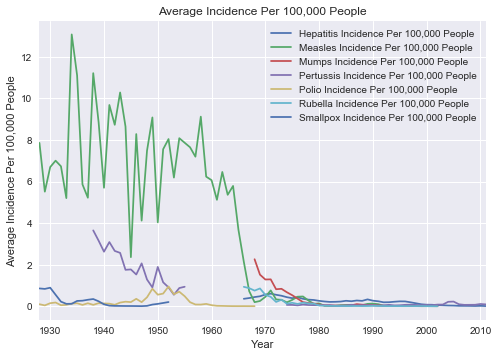

In [189]:
combined_incidence_mean_year_df.plot()
plt.title("Average Incidence Per 100,000 People")
plt.xlabel("Year")
plt.ylabel("Average Incidence Per 100,000 People")
plt.savefig("images/avg_incidence_byyear_all" + '.png', bbox_inches='tight')

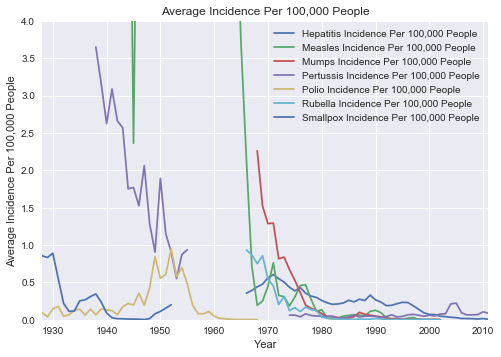

In [190]:
combined_incidence_mean_year_df.plot()
plt.title("Average Incidence Per 100,000 People")
plt.xlabel("Year")
plt.ylabel("Average Incidence Per 100,000 People")
plt.ylim(0, 4)
plt.savefig("images/avg_incidence_byyear_all_inset" + '.png', bbox_inches='tight')

In [67]:
grouped_clean_hepatitis_year_df = clean_hepatitis_df.groupby(["year"])
sum_grouped_clean_hepatitis_year_df = grouped_clean_hepatitis_year_df.sum()
sum_grouped_clean_hepatitis_year_df = sum_grouped_clean_hepatitis_year_df.drop(columns=["number_week"])
reset_sum_grouped_clean_hepatitis_year_df = sum_grouped_clean_hepatitis_year_df.reset_index()
reset_sum_grouped_clean_hepatitis_year_df.head()

,year,Number of Hepatitis Cases,"Hepatitis Incidence Per 100,000 People"
0,1966,32416,803.80
1,1967,38280,884.31
2,1968,45204,1023.76
3,1969,46012,1089.54
4,1970,55188,1344.31


In [68]:
grouped_clean_measles_year_df = clean_measles_df.groupby(["year"])
sum_grouped_clean_measles_year_df = grouped_clean_measles_year_df.sum()
sum_grouped_clean_measles_year_df = sum_grouped_clean_measles_year_df.drop(columns=["number_week"])
reset_sum_grouped_clean_measles_year_df = sum_grouped_clean_measles_year_df.reset_index()
reset_sum_grouped_clean_measles_year_df.head()

,year,Number of Measles Cases,"Measles Incidence Per 100,000 People"
0,1928,483337,16924.34
1,1929,339061,12060.96
2,1930,384597,14575.11
3,1931,438435,15427.67
4,1932,390114,14481.11


In [69]:
grouped_clean_mumps_year_df = clean_mumps_df.groupby(["year"])
sum_grouped_clean_mumps_year_df = grouped_clean_mumps_year_df.sum()
sum_grouped_clean_mumps_year_df = sum_grouped_clean_mumps_year_df.drop(columns=["number_week"])
reset_sum_grouped_clean_mumps_year_df = sum_grouped_clean_mumps_year_df.reset_index()
reset_sum_grouped_clean_mumps_year_df.head()

,year,Number of Mumps Cases,"Mumps Incidence Per 100,000 People"
0,1968,142744,4610.19
1,1969,81373,2950.99
2,1970,96916,3078.22
3,1971,114180,3099.56
4,1972,65594,1954.73


In [70]:
grouped_clean_pertussis_year_df = clean_pertussis_df.groupby(["year"])
sum_grouped_clean_pertussis_year_df = grouped_clean_pertussis_year_df.sum()
sum_grouped_clean_pertussis_year_df = sum_grouped_clean_pertussis_year_df.drop(columns=["number_week"])
reset_sum_grouped_clean_pertussis_year_df = sum_grouped_clean_pertussis_year_df.reset_index()
reset_sum_grouped_clean_pertussis_year_df.head()

,year,Number of Pertussis Cases,"Pertussis Incidence Per 100,000 People"
0,1938,209076,8653.06
1,1939,185646,7708.51
2,1940,172550,6314.55
3,1941,202413,7552.32
4,1942,177707,6525.45


In [71]:
grouped_clean_polio_year_df = clean_polio_df.groupby(["year"])
sum_grouped_clean_polio_year_df = grouped_clean_polio_year_df.sum()
sum_grouped_clean_polio_year_df = sum_grouped_clean_polio_year_df.drop(columns=["number_week"])
reset_sum_grouped_clean_polio_year_df = sum_grouped_clean_polio_year_df.reset_index()
reset_sum_grouped_clean_polio_year_df.head()

,year,Number of Polio Cases,"Polio Incidence Per 100,000 People"
0,1928,4756,231.13
1,1929,2746,98.12
2,1930,8964,350.05
3,1931,15743,438.43
4,1932,3829,119.28


In [72]:
grouped_clean_rubella_year_df = clean_rubella_df.groupby(["year"])
sum_grouped_clean_rubella_year_df = grouped_clean_rubella_year_df.sum()
sum_grouped_clean_rubella_year_df = sum_grouped_clean_rubella_year_df.drop(columns=["number_week"])
reset_sum_grouped_clean_rubella_year_df = sum_grouped_clean_rubella_year_df.reset_index()
reset_sum_grouped_clean_rubella_year_df.head()

,year,Number of Rubella Cases,"Rubella Incidence Per 100,000 People"
0,1966,44929,1450.81
1,1967,42154,1333.53
2,1968,47909,1360.25
3,1969,52746,1665.27
4,1970,53906,1341.09


In [73]:
grouped_clean_smallpox_year_df = clean_smallpox_df.groupby(["year"])
sum_grouped_clean_smallpox_year_df = grouped_clean_smallpox_year_df.sum()
sum_grouped_clean_smallpox_year_df = sum_grouped_clean_smallpox_year_df.drop(columns=["number_week"])
reset_sum_grouped_clean_smallpox_year_df = sum_grouped_clean_smallpox_year_df.reset_index()
reset_sum_grouped_clean_smallpox_year_df.head()

,year,Number of Smallpox Cases,"Smallpox Incidence Per 100,000 People"
0,1928,36470,2021.96
1,1929,38389,2032.15
2,1930,45728,2178.55
3,1931,28708,1352.82
4,1932,10740,542.68


In [74]:
combined_data_sum_year_df = pd.concat([sum_grouped_clean_hepatitis_year_df, sum_grouped_clean_measles_year_df, sum_grouped_clean_mumps_year_df, sum_grouped_clean_pertussis_year_df, sum_grouped_clean_polio_year_df, sum_grouped_clean_rubella_year_df, sum_grouped_clean_smallpox_year_df], axis=1, join='outer', ignore_index=False, sort=True)
combined_data_sum_year_df.head()

,Number of Hepatitis Cases,"Hepatitis Incidence Per 100,000 People",Number of Measles Cases,"Measles Incidence Per 100,000 People",Number of Mumps Cases,"Mumps Incidence Per 100,000 People",Number of Pertussis Cases,"Pertussis Incidence Per 100,000 People",Number of Polio Cases,"Polio Incidence Per 100,000 People",Number of Rubella Cases,"Rubella Incidence Per 100,000 People",Number of Smallpox Cases,"Smallpox Incidence Per 100,000 People"
year,,,,,,,,,,,,,,
1928,NaN,NaN,483337.0,16924.34,NaN,NaN,NaN,NaN,4756.0,231.13,NaN,NaN,36470.0,2021.96
1929,NaN,NaN,339061.0,12060.96,NaN,NaN,NaN,NaN,2746.0,98.12,NaN,NaN,38389.0,2032.15
1930,NaN,NaN,384597.0,14575.11,NaN,NaN,NaN,NaN,8964.0,350.05,NaN,NaN,45728.0,2178.55
1931,NaN,NaN,438435.0,15427.67,NaN,NaN,NaN,NaN,15743.0,438.43,NaN,NaN,28708.0,1352.82
1932,NaN,NaN,390114.0,14481.11,NaN,NaN,NaN,NaN,3829.0,119.28,NaN,NaN,10740.0,542.68


In [75]:
combined_numbercases_sum_year_df = combined_data_sum_year_df[["Number of Hepatitis Cases", "Number of Measles Cases", "Number of Mumps Cases", "Number of Pertussis Cases", "Number of Polio Cases", "Number of Rubella Cases", "Number of Smallpox Cases"]]
combined_numbercases_sum_year_df.head()

,Number of Hepatitis Cases,Number of Measles Cases,Number of Mumps Cases,Number of Pertussis Cases,Number of Polio Cases,Number of Rubella Cases,Number of Smallpox Cases
year,,,,,,,
1928,NaN,483337.0,NaN,NaN,4756.0,NaN,36470.0
1929,NaN,339061.0,NaN,NaN,2746.0,NaN,38389.0
1930,NaN,384597.0,NaN,NaN,8964.0,NaN,45728.0
1931,NaN,438435.0,NaN,NaN,15743.0,NaN,28708.0
1932,NaN,390114.0,NaN,NaN,3829.0,NaN,10740.0


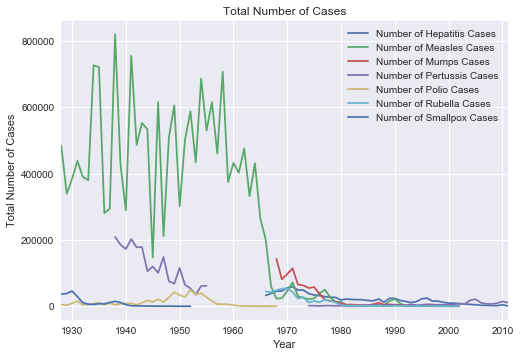

In [191]:
combined_numbercases_sum_year_df.plot()
plt.title("Total Number of Cases")
plt.xlabel("Year")
plt.ylabel("Total Number of Cases")
plt.savefig("images/total_number_cases_all_line" + '.png', bbox_inches='tight')

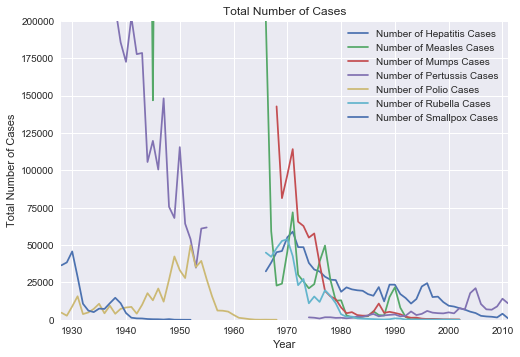

In [192]:
combined_numbercases_sum_year_df.plot()
plt.title("Total Number of Cases")
plt.xlabel("Year")
plt.ylabel("Total Number of Cases")
plt.ylim(0, 200000)
plt.savefig("images/total_number_cases_all_line_inset" + '.png', bbox_inches='tight')

In [77]:
combined_incidence_sum_year_df = combined_data_sum_year_df[["Hepatitis Incidence Per 100,000 People", "Measles Incidence Per 100,000 People", "Mumps Incidence Per 100,000 People", "Pertussis Incidence Per 100,000 People", "Polio Incidence Per 100,000 People", "Rubella Incidence Per 100,000 People", "Smallpox Incidence Per 100,000 People"]]
combined_incidence_sum_year_df.head()

,"Hepatitis Incidence Per 100,000 People","Measles Incidence Per 100,000 People","Mumps Incidence Per 100,000 People","Pertussis Incidence Per 100,000 People","Polio Incidence Per 100,000 People","Rubella Incidence Per 100,000 People","Smallpox Incidence Per 100,000 People"
year,,,,,,,
1928,NaN,16924.34,NaN,NaN,231.13,NaN,2021.96
1929,NaN,12060.96,NaN,NaN,98.12,NaN,2032.15
1930,NaN,14575.11,NaN,NaN,350.05,NaN,2178.55
1931,NaN,15427.67,NaN,NaN,438.43,NaN,1352.82
1932,NaN,14481.11,NaN,NaN,119.28,NaN,542.68


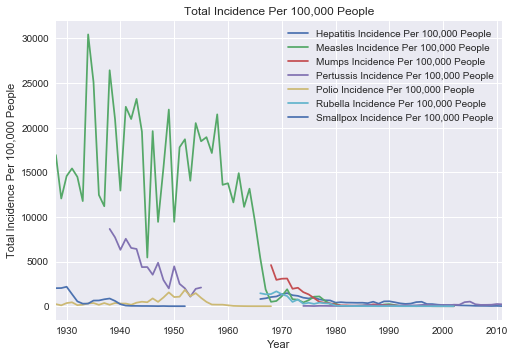

In [193]:
combined_incidence_sum_year_df.plot()
plt.title("Total Incidence Per 100,000 People")
plt.xlabel("Year")
plt.ylabel("Total Incidence Per 100,000 People")
plt.savefig("images/total_incidence_all_line" + '.png', bbox_inches='tight')

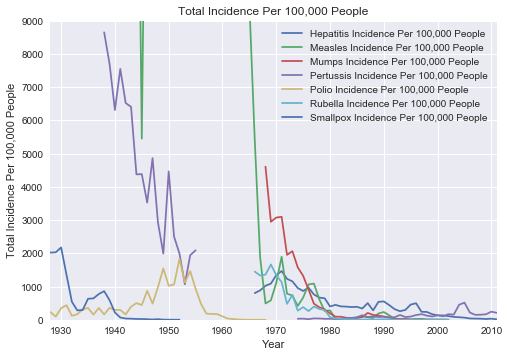

In [194]:
combined_incidence_sum_year_df.plot()
plt.title("Total Incidence Per 100,000 People")
plt.xlabel("Year")
plt.ylabel("Total Incidence Per 100,000 People")
plt.ylim(0, 9000)
plt.savefig("images/total_incidence_all_line_inset" + '.png', bbox_inches='tight')

In [88]:
grouped_clean_measles_df = clean_measles_df.groupby(["State Name", "state"])
sum_grouped_clean_measles_df = grouped_clean_measles_df.sum()
sum_grouped_clean_measles_df = sum_grouped_clean_measles_df.drop(columns=["year", "number_week"])
reset_sum_grouped_clean_measles_df = sum_grouped_clean_measles_df.reset_index()
reset_sum_grouped_clean_measles_df.head()

,State Name,state,Number of Measles Cases,"Measles Incidence Per 100,000 People"
0,ALABAMA,AL,209582,7100.53
1,ALASKA,AK,16908,7123.89
2,ARIZONA,AZ,160810,18287.95
3,ARKANSAS,AR,134250,7295.80
4,CALIFORNIA,CA,1376847,14237.99


In [ ]:
reset_sum_grouped_clean_measles_df.to_csv(r'measles_sum_bystate.csv')

In [196]:
df = pd.read_csv('measles_sum_bystate.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

df['text'] = df['State Name'] + '<br>' + \
    'Number of Measles Cases ' + df['Number of Measles Cases']

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = df['state'],
    z = df['Number of Measles Cases'].astype(float),
    locationmode = 'USA-states',
    text = df['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Total Number of Measles Cases")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Total Number of Measles Cases(1928-2002)<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jklug/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


C:\Users\jjtre\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [91]:
df = pd.read_csv('measles_sum_bystate.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

df['text'] = df['State Name'] + '<br>' + \
    'Number of Measles Cases ' + df['Number of Measles Cases']

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = df['state'],
    z = df['Measles Incidence Per 100,000 People'].astype(float),
    locationmode = 'USA-states',
    text = df['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Total Measles Incidence Per 100,000 People")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Total Measles Incidence Per 100,000 People(1928-2002)<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jklug/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [96]:
sum_grouped_clean_measles_year_df.head()

,Number of Measles Cases,"Measles Incidence Per 100,000 People"
year,,
1928,483337,16924.34
1929,339061,12060.96
1930,384597,14575.11
1931,438435,15427.67
1932,390114,14481.11


In [99]:
grouped_clean_measles_year_df = clean_measles_df.groupby(["year"])
sem_sum_grouped_clean_measles_year_df = grouped_clean_measles_year_df.sem()
sem_sum_grouped_clean_measles_year_df = sem_sum_grouped_clean_measles_year_df.drop(columns=["number_week", "State Name", "disease", "state"])
sem_sum_grouped_clean_measles_year_df.head()
#reset_sem_sum_grouped_clean_measles_year_df = sem_sum_grouped_clean_measles_year_df.reset_index()
#reset_sem_sum_grouped_clean_measles_year_df.head()

,"Measles Incidence Per 100,000 People",Number of Measles Cases
year,,
1928,0.302196,11.125190
1929,0.177230,7.139773
1930,0.231549,7.620093
1931,0.259438,10.021377
1932,0.299978,9.235918


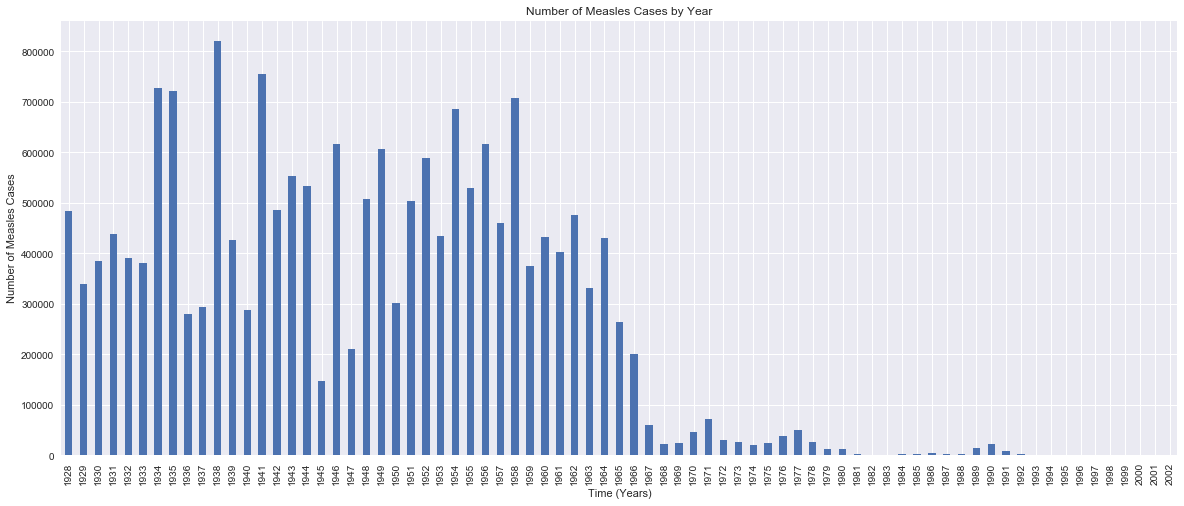

In [197]:
fig, ax = plt.subplots()
sum_grouped_clean_measles_year_df["Number of Measles Cases"].plot.bar(yerr=sem_sum_grouped_clean_measles_year_df["Number of Measles Cases"], ax=ax, capsize=4, figsize=(20,8))
plt.title("Number of Measles Cases by Year")
plt.xlabel("Time (Years)")
plt.ylabel("Number of Measles Cases")
#plt.ylim(0, 50)
plt.savefig("images/total_measles_byyear" + '.png', bbox_inches='tight')

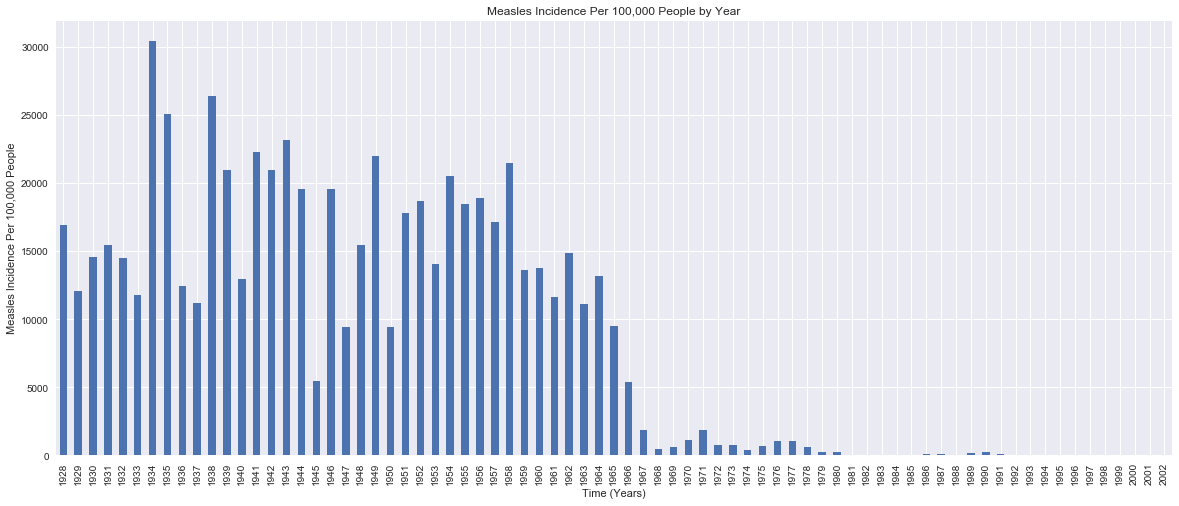

In [198]:
fig, ax = plt.subplots()
sum_grouped_clean_measles_year_df["Measles Incidence Per 100,000 People"].plot.bar(yerr=sem_sum_grouped_clean_measles_year_df["Measles Incidence Per 100,000 People"], ax=ax, capsize=4, figsize=(20,8))
plt.title("Measles Incidence Per 100,000 People by Year")
plt.xlabel("Time (Years)")
plt.ylabel("Measles Incidence Per 100,000 People")
#plt.ylim(0, 50)
plt.savefig("images/total_measles_incidence_byyear" + '.png', bbox_inches='tight')

In [132]:
graph_clean_measles_df = measles_df.drop(columns=["Unnamed: 0", "state", "State Name", "disease", "number_week"])
graph_clean_measles_df.head()

organized_graph_clean_measles_df = graph_clean_measles_df[["year", "Number of Measles Cases", "Measles Incidence Per 100,000 People"]]
organized_graph_clean_measles_df.head()

,year,Number of Measles Cases,"Measles Incidence Per 100,000 People"
0,1928,97,3.67
1,1928,76,4.11
2,1928,8,1.90
3,1928,74,1.38
4,1928,85,8.38


In [134]:
Cases_1963 = organized_graph_clean_measles_df[organized_graph_clean_measles_df["year"] == 1963]["Number of Measles Cases"]
Cases_1964 = organized_graph_clean_measles_df[organized_graph_clean_measles_df["year"] == 1964]["Number of Measles Cases"]
Cases_1965 = organized_graph_clean_measles_df[organized_graph_clean_measles_df["year"] == 1965]["Number of Measles Cases"]
Cases_1966 = organized_graph_clean_measles_df[organized_graph_clean_measles_df["year"] == 1966]["Number of Measles Cases"]
Cases_1967 = organized_graph_clean_measles_df[organized_graph_clean_measles_df["year"] == 1967]["Number of Measles Cases"]
Cases_1967.head()

89525    18
89526    30
89527     5
89528    22
89529    43
Name: Number of Measles Cases, dtype: int64

In [135]:
stats.f_oneway(Cases_1963, Cases_1964, Cases_1965, Cases_1966, Cases_1967)

F_onewayResult(statistic=131.04338480616562, pvalue=9.591204290319237e-110)

In [136]:
incidence_1963 = organized_graph_clean_measles_df[organized_graph_clean_measles_df["year"] == 1963]["Measles Incidence Per 100,000 People"]
incidence_1964 = organized_graph_clean_measles_df[organized_graph_clean_measles_df["year"] == 1964]["Measles Incidence Per 100,000 People"]
incidence_1965 = organized_graph_clean_measles_df[organized_graph_clean_measles_df["year"] == 1965]["Measles Incidence Per 100,000 People"]
incidence_1966 = organized_graph_clean_measles_df[organized_graph_clean_measles_df["year"] == 1966]["Measles Incidence Per 100,000 People"]
incidence_1967 = organized_graph_clean_measles_df[organized_graph_clean_measles_df["year"] == 1967]["Measles Incidence Per 100,000 People"]
incidence_1967.head()

89525    6.47
89526    0.87
89527    0.26
89528    1.34
89529    0.22
Name: Measles Incidence Per 100,000 People, dtype: float64

In [137]:
stats.f_oneway(incidence_1963, incidence_1964, incidence_1965, incidence_1966, incidence_1967)

F_onewayResult(statistic=200.5690363707365, pvalue=8.158324344539186e-167)

In [146]:
organized_graph_clean_measles_df.head()
#organized_graph_clean_measles_df.set_index("year", inplace=True)
#organized_graph_clean_measles_df.head()

,Number of Measles Cases,"Measles Incidence Per 100,000 People"
year,,
1928,97,3.67
1928,76,4.11
1928,8,1.90
1928,74,1.38
1928,85,8.38


In [166]:
subset = organized_graph_clean_measles_df.loc[["1963", "1964", "1965", "1966"]]
subset = subset.rename(columns={"Number of Measles Cases": "cases", "Measles Incidence Per 100,000 People": "incidence"})
subset.head()

,cases,incidence
year,,
1963,11,0.33
1963,41,2.19
1963,94,6.18
1963,93,0.53
1963,262,13.53


In [167]:
subset_reset = subset.reset_index()
subset_reset.head()

,year,cases,incidence
0,1963,11,0.33
1,1963,41,2.19
2,1963,94,6.18
3,1963,93,0.53
4,1963,262,13.53


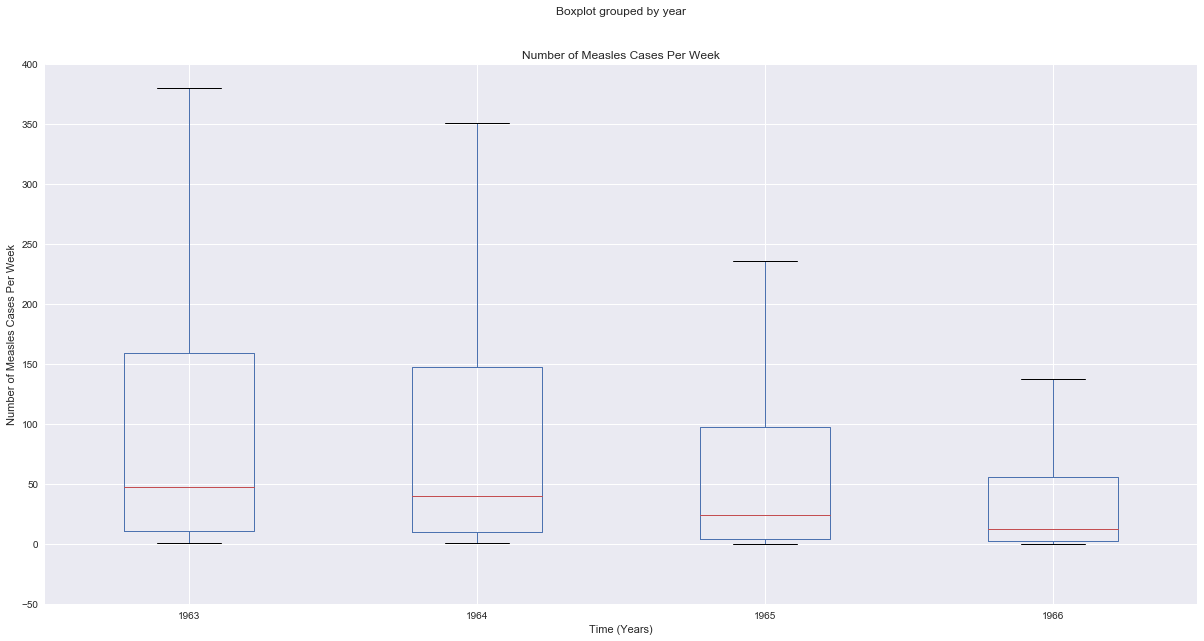

In [199]:
subset_reset.boxplot("cases", by="year", figsize=(20, 10))
plt.title("Number of Measles Cases Per Week")
plt.xlabel("Time (Years)")
plt.ylabel("Number of Measles Cases Per Week")
plt.ylim(-50, 400)
plt.savefig("images/total_measles_box_plot" + '.png', bbox_inches='tight')

In [168]:
lm = sfa.ols('cases ~ C(year)', data=subset_reset).fit()
anova = sa.stats.anova_lm(lm)
print(anova)

              df        sum_sq       mean_sq         F        PR(>F)
C(year)      3.0  1.852680e+07  6.175601e+06  61.36225  2.768965e-39
Residual  9469.0  9.529763e+08  1.006417e+05       NaN           NaN


In [169]:
sp.posthoc_ttest(subset_reset, val_col='cases', group_col='year', p_adjust='holm')

,1963,1964,1965,1966
1963,-1.000000e+00,1.845128e-02,3.594204e-11,2.947919e-21
1964,1.845128e-02,-1.000000e+00,8.334095e-18,5.972265e-28
1965,3.594204e-11,8.334095e-18,-1.000000e+00,1.219073e-04
1966,2.947919e-21,5.972265e-28,1.219073e-04,-1.000000e+00
